# サポートベクター回帰のデモプログラム

サポートベクター回帰のデモプログラムです。  
サポートベクター回帰の中身に関してはこちら↓で解説しています。  
https://yuyumoyuyu.com/2021/01/10/supportvectorregression/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### データの整形

In [2]:
# ボストンの住宅価格データセットを用いる
from sklearn.datasets import load_boston

boston = load_boston()

# 入力変数
df_boston_X = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
# 目的変数（住宅価格）
df_boston_y = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston_y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [4]:
# データのtrain/test分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_boston_X, boston.target, random_state=1, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [5]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88


In [6]:
# 入力データの正規化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# スケーラを保存したいときは↓を有効化
# joblib.dump(scaler, "scaler_path.pkl")

In [7]:
print("pre-transformed shape: {}".format(X_train.shape))
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

pre-transformed shape: (404, 13)
transformed shape: (404, 13)
per-feature minimum before scaling:
 CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
dtype: float64
per-feature maximum before scaling:
 CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
dtype: float64
per-feature minimum after scaling:
 [-0.40404675 -0.49559343 -1.55228176 -0.29329423 -1.43919784 -3.93359952
 -2.27972757 -1.27291627 -0.97702399 -1.28098535 -2.69460131 -3.90288077
 -1.53292984]
per-feature maximum after scaling:
 [9.33496077 3.80373548 2.43606262 3.40954542 2.7235458  3.64802244
 1

### 線形モデル（Ridge, LASSO）による予測

In [8]:
# 線形モデルの適用
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV

In [9]:
# グリッドサーチによるハイパーパラメータ最適化
param_grid = {'alpha': [10.**i for i in range(-5,3)]}
linear_models = [Ridge(max_iter=100000), Lasso(max_iter=100000)]

opt_alphas = []
for j in range(len(linear_models)):
    print("=={}==".format(linear_models[j]))
    
    grid_search = GridSearchCV(linear_models[j], param_grid, cv=5, return_train_score=True)
    grid_search.fit(X_train_scaled, y_train)

    opt_alphas.append(grid_search.best_params_['alpha'])

    print("best parameters: ", grid_search.best_params_)
    print("best score: {:.3f}".format(grid_search.best_score_))

==Ridge(max_iter=100000)==
best parameters:  {'alpha': 1.0}
best score: 0.703
==Lasso(max_iter=100000)==
best parameters:  {'alpha': 0.01}
best score: 0.703


In [10]:
# 線形モデルによる予測結果ーハイパーパラメータ最適化後
print("■ Ridge")

ridge = Ridge(alpha=opt_alphas[0],max_iter=100000).fit(X_train_scaled, y_train)

print("  Training set score: {:.3f}".format( ridge.score(X_train_scaled, y_train) )) 
print("  Test set score: {:.3f}".format( ridge.score(X_test_scaled, y_test) ))

print("■ Lasso")

lasso = Lasso(alpha=opt_alphas[1],max_iter=100000).fit(X_train_scaled, y_train)

print("  Training set score: {:.3f}".format( lasso.score(X_train_scaled, y_train) )) 
print("  Test set score: {:.3f}".format( lasso.score(X_test_scaled, y_test) ))

■ Ridge
  Training set score: 0.729
  Test set score: 0.763
■ Lasso
  Training set score: 0.729
  Test set score: 0.763


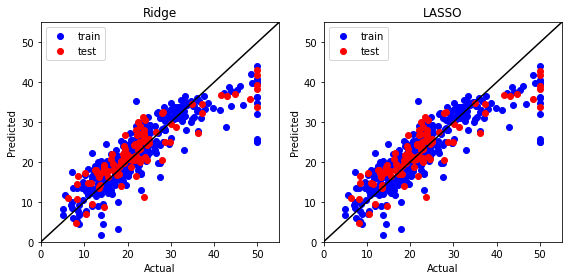

In [11]:
# 学習結果を可視化
models = [ridge, lasso]
titles = ['Ridge', 'LASSO']

fig, ax = plt.subplots(1, 2, figsize=(8,4))

for ax_, model_, title_ in zip(ax, models, titles):
    
    y_calculated_train = model_.predict(X_train_scaled)
    y_predicted_test = model_.predict(X_test_scaled)
    
    ax_.plot(y_train, y_calculated_train, 'o', color='b', label='train')
    ax_.plot(y_test, y_predicted_test, 'o', color='r', label='test')
    
    ax_.plot([0, 60], [0, 60], '-', color='k')
    
    ax_.set_xlim([0, 55])
    ax_.set_ylim([0, 55])
    
    ax_.set_xlabel('Actual')
    ax_.set_ylabel('Predicted')
    
    ax_.set_title(title_)
    
    ax_.legend(loc='best')
    
fig.tight_layout()

### サポートベクター回帰による予測

カーネル関数にはrbf(ガウシアン)カーネルを使用。  
ハイパラの調整にはこちら↓のサイトの高速化理論を参考にしています。
https://datachemeng.com/fastoptsvrhyperparams/

In [12]:
from sklearn.svm import SVR

import time

In [13]:
# ハイパーパラメータ最適化
t1 = time.time()
print("SVR")

# グリッドの設定
svrcs = 2**np.arange( -5, 11, dtype=float)          # C
svrepsilons = 2**np.arange( -10, 1, dtype=float)    # ε
svrgammas = 2**np.arange( -20, 11, dtype=float)     # γ
cv = 5 # 交差検証の分割数

# ガンマをグラム行列の分散が最大になるよう選択し固定
npX = np.array(X_train_scaled)
var_gram = []
for svrgamma in svrgammas:
    gram_matrix = np.exp(-svrgamma*((npX[:, np.newaxis] - npX)**2).sum(axis=2))
    var_gram.append(gram_matrix.var(ddof=1))
opt_gamma_tmp = svrgammas[np.where(var_gram == np.max(var_gram))[0][0]]

t2 = time.time()
elapsed_time = t2-t1
print("Elapsed time: {} sec\n".format(elapsed_time))

# Cをyの平均+3σで固定
C_tmp = y_train.mean() + 3*y_train.std()

t2 = time.time()
elapsed_time = t2-t1
print("Elapsed time: {} sec\n".format(elapsed_time))

# εの最適値探索
gs_eps = GridSearchCV(SVR(kernel="rbf", C=C_tmp, gamma=opt_gamma_tmp), 
                      {'epsilon': svrepsilons}, cv=cv, return_train_score=True)
gs_eps.fit(X_train_scaled, y_train)
opt_eps = gs_eps.best_params_['epsilon']

print("best parameters: {}".format(gs_eps.best_params_))
print("best cross-validation score: {:.3f}".format(gs_eps.best_score_))

t2 = time.time()
elapsed_time = t2-t1
print("Elapsed time: {} sec\n".format(elapsed_time))

# Cの最適値探索
gs_C = GridSearchCV(SVR(kernel="rbf", epsilon=opt_eps, gamma=opt_gamma_tmp), 
                      {'C': svrcs}, cv=cv, return_train_score=True)
gs_C.fit(X_train_scaled, y_train)
opt_C = gs_C.best_params_['C']

print("best parameters: {}".format(gs_C.best_params_))
print("best cross-validation score: {:.3f}".format(gs_C.best_score_))

t2 = time.time()
elapsed_time = t2-t1
print("Elapsed time: {} sec\n".format(elapsed_time))

# γの最適値探索（なくてもいい）
gs_gamma = GridSearchCV(SVR(kernel="rbf", epsilon=opt_eps, C=opt_C), 
                        {'gamma': svrgammas}, cv=cv, return_train_score=True)
gs_gamma.fit(X_train_scaled, y_train)
opt_gamma = gs_gamma.best_params_['gamma']

print("best parameters: {}".format(gs_gamma.best_params_))
print("best cross-validation score: {:.3f}".format(gs_gamma.best_score_))

t2 = time.time()
elapsed_time = t2-t1
print("Elapsed time: {} sec".format(elapsed_time))


SVR
Elapsed time: 0.6493279933929443 sec

Elapsed time: 0.6493279933929443 sec

best parameters: {'epsilon': 0.5}
best cross-validation score: 0.839
Elapsed time: 1.4431991577148438 sec

best parameters: {'C': 256.0}
best cross-validation score: 0.852
Elapsed time: 2.823488235473633 sec

best parameters: {'gamma': 0.03125}
best cross-validation score: 0.853
Elapsed time: 4.776481628417969 sec


In [14]:
# SVRの予測結果ーハイパーパラメータ最適化後
svr = SVR(kernel="rbf", C=opt_C, epsilon=opt_eps,
          gamma=opt_gamma).fit(X_train_scaled, y_train)

print("SVR")
print("  Training set score: {:.3f}".format(svr.score(X_train_scaled, y_train))) 
print("  Test set score: {:.3f}".format(svr.score(X_test_scaled, y_test)))

# joblib.dump(svr, "path_svr.pkl")

SVR
  Training set score: 0.937
  Test set score: 0.924


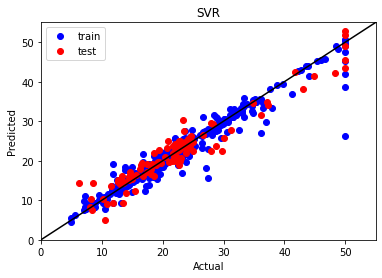

In [16]:
# 学習結果を可視化
y_calculated_train = svr.predict(X_train_scaled)
y_predicted_test = svr.predict(X_test_scaled)

plt.plot(y_train, y_calculated_train, 'o', color='b', label='train')
plt.plot(y_test, y_predicted_test, 'o', color='r', label='test')

plt.plot([0, 60], [0, 60], '-', color='k')

plt.xlim([0, 55])
plt.ylim([0, 55])

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('SVR')

plt.legend(loc='best')

plt.show()